In [5]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Support Vector Machines

• The aim is to find the line which maximises the margin between classes

• Outliers don't influence this type of model

In [8]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal length","sepal width",
                                                                                           "petal length","petal width","class"])

In [9]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X = iris.drop("class", axis = 1).values
Y = iris["class"].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [15]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)

In [17]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [18]:
#Let's build a model with two properties (for viz)

In [19]:
X2_train = X_train[:,:2]
X2_test = X_test[:,:2]

In [20]:
from sklearn.svm import LinearSVC

In [21]:
svc = LinearSVC()
svc.fit(X2_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [25]:
print("Accuracy: Train = %.4f Test = %.4f" % (svc.score(X2_train, Y_train), svc.score(X2_test,Y_test)))

Accuracy: Train = 0.8286 Test = 0.6889


In [27]:
def plot_bounds(X,Y,model=None,classes=None, figsize=(8,6)):
        
    plt.figure(figsize=figsize)
        
    if(model):
        X_train, X_test = X
        Y_train, Y_test = Y
        X = np.vstack([X_train, X_test])
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                             np.arange(y_min, y_max, .02))

        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        else:
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=.8)

    plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, alpha=0.6)
    
    plt.show()


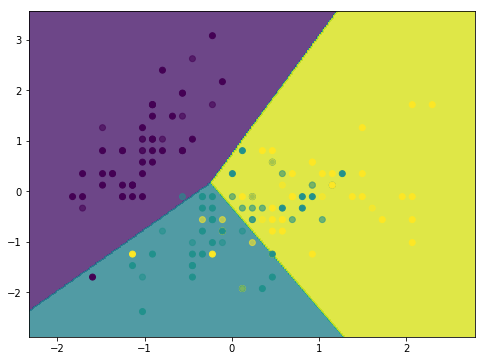

In [28]:
plot_bounds((X2_train,X2_test),(Y_train,Y_test),svc)

# Kernel SVM: 
If the observations are distributed in such a way that no margin can be traced(like iris dataset), we should use Kernel SVM: 

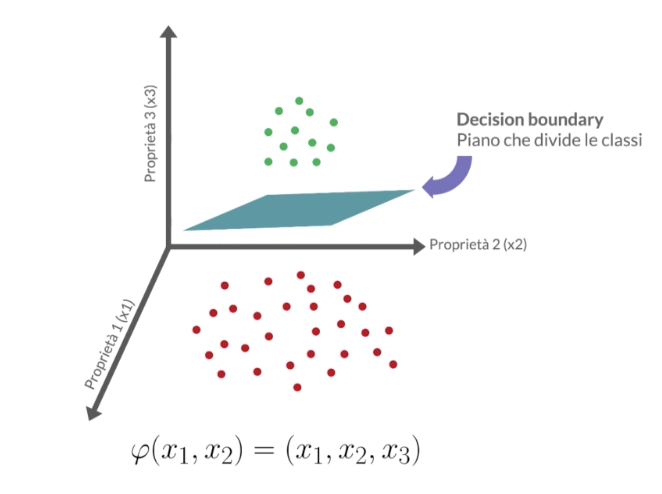

In [29]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/svmk.png'
Image(filename=img)

If we project the properties into another dimension, and then go back we get: 

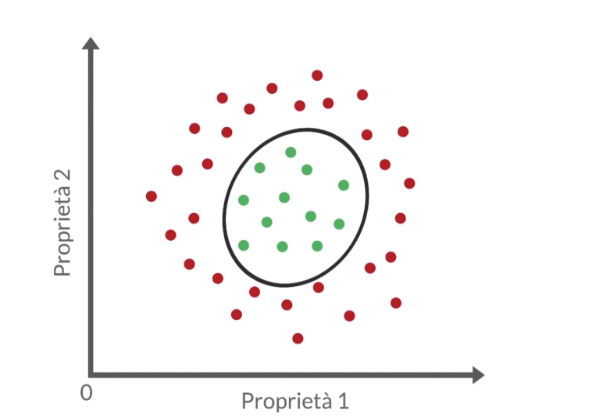

In [32]:
img = '/Users/lorenzofamiglini/Desktop/sv.png'
Image(filename=img)
# We obtain an ellipse (in this case) 

• Main issue:

1) It's quite expensive in terms of computational power 

For this reason, we will use Kernel trick: simulate the same effect as a projection using a kernel function (usually Gaussian Kernel). 

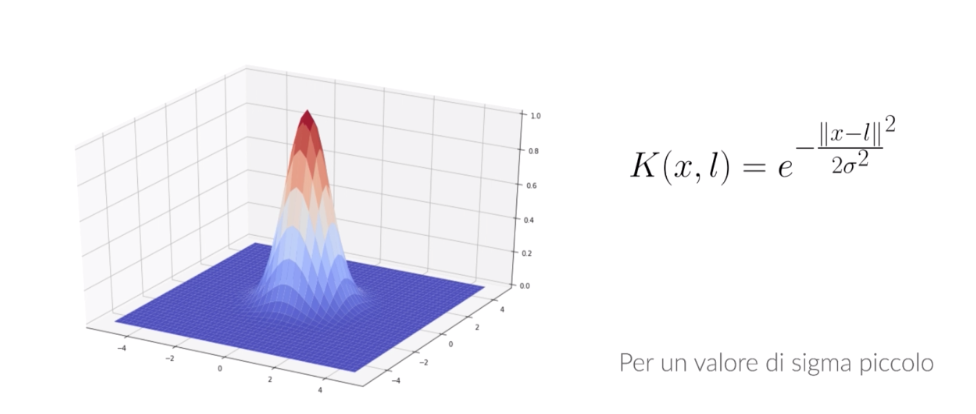

In [34]:
img = '/Users/lorenzofamiglini/Desktop/kernel.png'
Image(filename=img)

• If two example are quite different, the function tend to zero. 

• If two example are quite different, the function tend to one. 

In [36]:
from sklearn.datasets import make_circles
X, Y = make_circles(noise = 0.2, factor =0.5, random_state = 1)

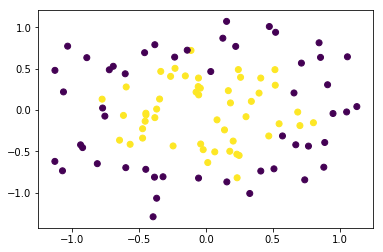

In [39]:
plt.scatter(X[:,0], X[:,1], c = Y)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.3, random_state = 0)

In [52]:
from sklearn.svm import SVC

In [53]:
#Linear: is the same of the previous one
svc = SVC(kernel = "linear", probability = True) #prob. == True for Log Loss (quite expensive)

In [54]:
svc.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
print("Accuracy: Train = %.4f Test = %.4f" %(svc.score(X_train, Y_train),
                                            svc.score(X_test, Y_test)))

Accuracy: Train = 0.5143 Test = 0.4667


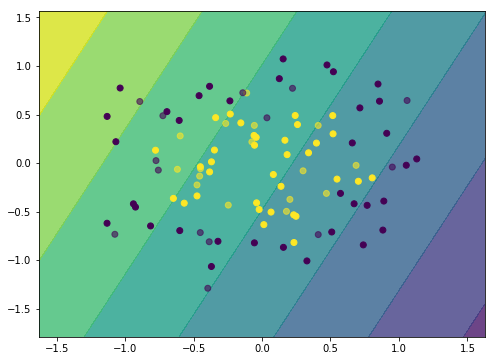

In [56]:
plot_bounds((X_train,X_test), (Y_train, Y_test),svc)

In [57]:
#Gaussian Kernel
svc = SVC(kernel = "rbf", probability = True) 
svc.fit(X_train, Y_train)
print("Accuracy: Train = %.4f Test = %.4f" %(svc.score(X_train, Y_train),
                                            svc.score(X_test, Y_test)))

Accuracy: Train = 0.9143 Test = 0.9000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


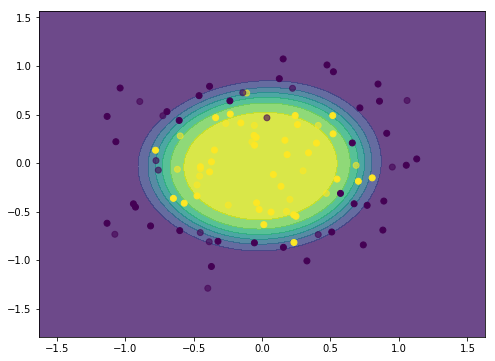

In [58]:
plot_bounds((X_train,X_test), (Y_train, Y_test),svc)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: Train = 0.5143 Test = 0.4667


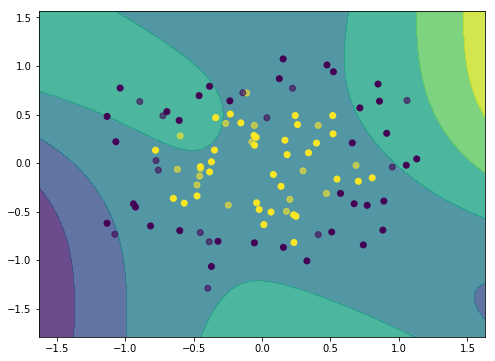

In [59]:
#Sigmoid Kernel: 
svc = SVC(kernel = "sigmoid", probability = True) 
svc.fit(X_train, Y_train)
print("Accuracy: Train = %.4f Test = %.4f" %(svc.score(X_train, Y_train),
                                            svc.score(X_test, Y_test)))
plot_bounds((X_train,X_test), (Y_train, Y_test),svc)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: Train = 0.5143 Test = 0.4667


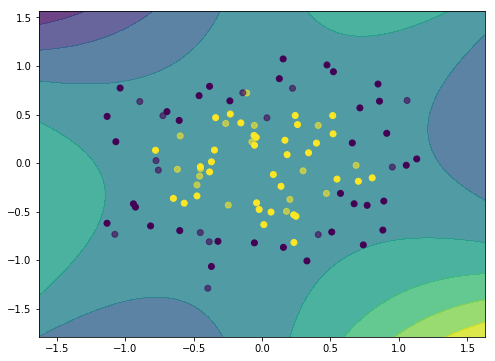

In [60]:
#Polynomial Kernel: 
svc = SVC(kernel = "poly", probability = True) 
svc.fit(X_train, Y_train)
print("Accuracy: Train = %.4f Test = %.4f" %(svc.score(X_train, Y_train),
                                            svc.score(X_test, Y_test)))
plot_bounds((X_train,X_test), (Y_train, Y_test),svc)